## Working with Images

In this tutorial, we'll use our existing knowledge of PyTorch and linear regression to solve a very different kind of problem: *image classification*. We'll use the famous [*MNIST Handwritten Digits Database*](http://yann.lecun.com/exdb/mnist/) as our training dataset. It consists of 28px by 28px grayscale images of handwritten digits (0 to 9) and labels for each image indicating which digit it represents. Here are some sample images from the dataset:

![mnist-sample](https://i.imgur.com/CAYnuo1.jpg)

In [6]:
import torch
import torchvision
from torchvision.datasets import MNIST

🧠 What is torchvision in PyTorch?

torchvision is an official PyTorch library that provides tools, datasets, and pretrained models specifically designed for computer vision tasks like:

Image classification

Object detection

Image segmentation

Image transformations and preprocessing

It helps you work with image data easily — instead of writing all the low-level code yourself.

⚙️ Main Components of torchvision
| Component                    | Description                                                   | Example                                                               |
| ---------------------------- | ------------------------------------------------------------- | --------------------------------------------------------------------- |
| **`torchvision.datasets`**   | Ready-to-use popular datasets for training/testing            | `CIFAR10`, `MNIST`, `ImageNet`, etc.                                  |
| **`torchvision.transforms`** | Image preprocessing utilities (resize, crop, normalize, etc.) | `transforms.Compose([transforms.Resize(256), transforms.ToTensor()])` |
| **`torchvision.models`**     | Pretrained deep learning models for vision tasks              | `resnet50`, `vgg16`, `mobilenet_v3`, etc.                             |
| **`torchvision.io`**         | Functions for reading and writing images/videos               | `torchvision.io.read_image("img.png")`                                |


In [7]:
dataset = MNIST(root='/content/data', download=True)

100%|██████████| 9.91M/9.91M [00:01<00:00, 6.08MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 160kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.52MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 9.77MB/s]


not only downloaded the file it automatically converts to pytorch dataset

In [8]:
len(dataset)

60000

The dataset has 60,000 images that we'll use to train the model. There is also an additional test set of 10,000 images used for evaluating models and reporting metrics in papers and reports. We can create the test dataset using the `MNIST` class by passing `train=False` to the constructor.

In [9]:
test_dataset = MNIST(root = '/content/data',train = False)

In [10]:
len(test_dataset)

10000

## 🧠 How MNIST Dataset Works in PyTorch

When we download MNIST using:
```python
from torchvision.datasets import MNIST
dataset = MNIST(root='/content/data', download=True)
PyTorch automatically:

Downloads raw binary files (.ubyte format).

Converts them to tensors and saves as:

bash
Copy code
/data/MNIST/processed/
├── training.pt
└── test.pt
Each .pt file contains a tuple of tensors:

python
Copy code
(images_tensor, labels_tensor)
🖼️ Image Tensor Details
Shape: [60000, 28, 28] for training data

Each pixel → brightness value

0 → black

255 → white

In-between → gray levels

After transforms.ToTensor(), values are normalized to range [0.0, 1.0]

🏷️ Label Tensor Details
Shape: [60000]

Contains digit class labels (0–9)

🧮 Example in Code
python
Copy code
from torchvision.datasets import MNIST
from torchvision import transforms

dataset = MNIST(root='/content/data', download=True, transform=transforms.ToTensor())

img, label = dataset[0]
print(type(img), img.shape)   # torch.Tensor, torch.Size([1, 28, 28])
print(label)                  # Example: 5



label 5


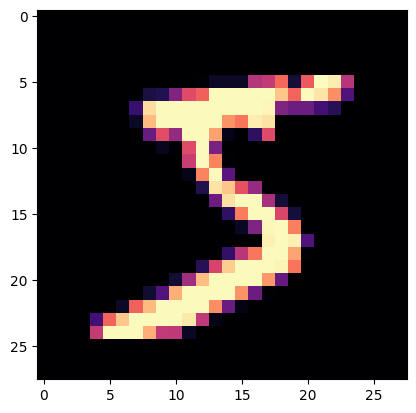

In [11]:
import matplotlib.pyplot as plt
image,label = dataset[0]
plt.imshow(image,cmap='magma')
print('label',label)

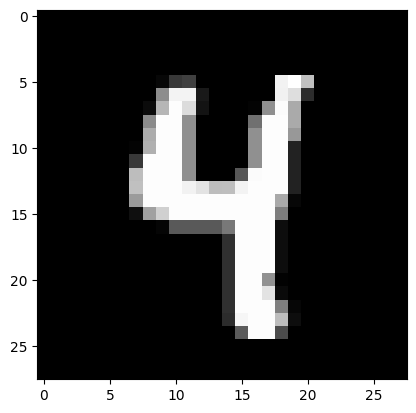

In [12]:
image,label = dataset[49546]
plt.imshow(image,cmap='gray')

Summary of Data Evolution                                             
Disk: Compressed Bytes (idx format).

Dataset Load: PIL Image (28, 28), Integers 0-255.

ToTensor: Tensor (1, 28, 28), Floats 0.0-1.0.

Normalize: Tensor (1, 28, 28), Floats ~ -0.4 to 2.8.

DataLoader: Tensor (64, 1, 28, 28), Ready for Model.

## 💾 Understanding Image Tensor Structure (C, H, W)

When working with images in PyTorch, the raw pixel data must be converted into a tensor structure that the **Convolutional Neural Network (CNN)** can understand and process efficiently. This is why the `transforms.ToTensor()` step adds the **Channel (C)** dimension and reorders the structure.

---

### 1. The Channel Dimension ($\mathbf{C}$)

The channel dimension is added to specify the type of information stored per pixel.

| Image Type | Channel Count ($\mathbf{C}$) | Example Shape (Single Image) | Rationale |
| :--- | :--- | :--- | :--- |
| **Grayscale** (MNIST) | $\mathbf{1}$ | $\mathbf{(1, 28, 28)}$ | Stores only **luminance** (brightness). |
| **Color** (RGB) | $\mathbf{3}$ | $\mathbf{(3, H, W)}$ | Stores **Red, Green, and Blue** intensities separately. |



[Image of RGB color channels separated]


### 2. The Final Tensor Form (4D Structure)

The goal of the transformation pipeline is to provide the CNN with a spatially intact data structure.

* **Classic Neural Networks (MLP):** These require a flattened **1D array** (e.g., $784$ features) because they treat every pixel independently.
* **Convolutional Neural Networks (CNN):** These require the **spatial adjacency** of pixels to be preserved so the convolutional **filters (kernels)** can scan and detect local patterns (edges, corners).

Therefore, the final data structure, when passed to the model in batches, is a **4D Tensor**:

$$\mathbf{(B, C, H, W)}$$

Where:
* $\mathbf{B}$: **Batch Size** (The number of images processed simultaneously).
* $\mathbf{C}$: **Channels** (1 for MNIST).
* $\mathbf{H}$: **Height** (28 pixels).
* $\mathbf{W}$: **Width** (28 pixels).

This 4D structure is the standard input requirement for almost all modern image classification models.

In [13]:
from torchvision import transforms

In [14]:
dataset = MNIST(root='/content/data',train=True,transform=transforms.ToTensor())

In [15]:
img_tensor,label = dataset[342]
print(img_tensor.shape,label)

torch.Size([1, 28, 28]) 4


In [16]:
print(img_tensor)

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

TypeError: Invalid shape (1, 28, 28) for image data

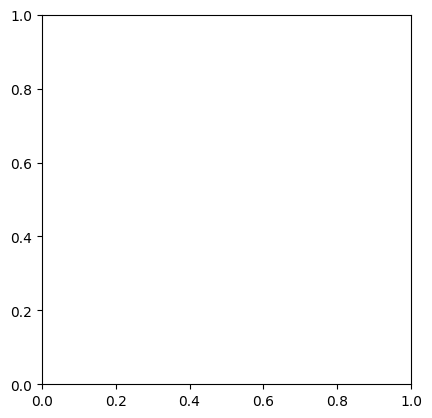

In [17]:
plt.imshow(img_tensor,cmap='gray')

This error is happening because Matplotlib expects image data in shape (H, W) for grayscale or (H, W, 3/4) for RGB/RGBA, but your tensor has shape (1, 28, 28) — that extra leading 1 channel dimension is causing the problem.

✅ How to fix it
You need to remove (or "squeeze") the channel dimension:
plt.imshow(img_tensor.squeeze(), cmap='gray')
plt.show()


- .squeeze() removes dimensions of size 1, so (1, 28, 28) becomes (28, 28).
- Now Matplotlib sees it as a proper 2D grayscale image.


grayscale is only 1 channel but usually other colours which we see are 3 channels they are r g b 

train test split , we also need validation dataset here

In [18]:
from torch.utils.data import random_split
train_ds,val_ds = random_split(dataset,[50000,10000])
len(train_ds),len(val_ds)

(50000, 10000)

In [19]:
from torch.utils.data import DataLoader
batch_size=128

train_loader=DataLoader(train_ds,batch_size,shuffle=True)
val_loader = DataLoader(val_ds,batch_size)

## Model

Now that we have prepared our data loaders, we can define our model.

* A **logistic regression** model is almost identical to a linear regression model. It contains weights and bias matrices, and the output is obtained using simple matrix operations (`pred = x @ w.t() + b`). 

* As we did with linear regression, we can use `nn.Linear` to create the model instead of manually creating and initializing the matrices.

* Since `nn.Linear` expects each training example to be a vector, each `1x28x28` image tensor is _flattened_ into a vector of size 784 `(28*28)` before being passed into the model. 

* The output for each image is a vector of size 10, with each element signifying the probability of a particular target label (i.e., 0 to 9). The predicted label for an image is simply the one with the highest probability.

In [20]:
import torch.nn as nn
input_size = 28*28
num_classes = 10

#logistic regression model
model = nn.Linear(input_size,num_classes)

In [21]:
print(model.parameters)

<bound method Module.parameters of Linear(in_features=784, out_features=10, bias=True)>


In [22]:
print(model.weight.shape)

torch.Size([10, 784])


In [23]:
model.weight

Parameter containing:
tensor([[ 0.0357, -0.0300,  0.0148,  ..., -0.0311, -0.0070,  0.0053],
        [-0.0217, -0.0135,  0.0035,  ...,  0.0031, -0.0347, -0.0054],
        [-0.0052,  0.0056, -0.0130,  ..., -0.0167,  0.0154,  0.0217],
        ...,
        [ 0.0260, -0.0207, -0.0015,  ..., -0.0172, -0.0322,  0.0213],
        [ 0.0023,  0.0125, -0.0173,  ...,  0.0078, -0.0274,  0.0163],
        [-0.0050,  0.0164, -0.0137,  ..., -0.0259,  0.0167,  0.0336]],
       requires_grad=True)

In [24]:
model.bias

Parameter containing:
tensor([ 0.0109, -0.0027, -0.0178, -0.0229,  0.0310,  0.0147, -0.0032,  0.0005,
        -0.0303, -0.0289], requires_grad=True)

In [25]:
for images,label in train_loader:
    print(label)
    print(images.shape)
    print(model(images))
    break

tensor([9, 1, 3, 2, 7, 1, 7, 4, 3, 5, 9, 7, 6, 6, 5, 0, 6, 2, 6, 0, 5, 9, 8, 6,
        6, 8, 4, 9, 7, 0, 1, 3, 3, 2, 6, 9, 3, 9, 6, 3, 8, 5, 0, 8, 8, 9, 6, 0,
        6, 2, 8, 9, 1, 2, 8, 7, 0, 3, 1, 7, 7, 6, 1, 8, 1, 3, 5, 5, 6, 6, 2, 9,
        9, 6, 3, 5, 8, 1, 2, 0, 4, 2, 3, 1, 4, 6, 9, 7, 7, 4, 6, 4, 7, 6, 2, 7,
        9, 1, 6, 4, 5, 7, 3, 5, 1, 6, 4, 5, 2, 9, 8, 2, 2, 8, 4, 2, 7, 5, 8, 6,
        9, 3, 0, 5, 8, 2, 7, 1])
torch.Size([128, 1, 28, 28])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (3584x28 and 784x10)

The code above leads to an error because our input data does not have the right shape. Our images are of the shape 1x28x28, but we need them to be vectors of size 784, i.e., we need to flatten them. We'll use the `.reshape` method of a tensor, which will allow us to efficiently 'view' each image as a flat vector without really creating a copy of the underlying data. To include this additional functionality within our model, we need to define a custom model by extending the `nn.Module` class from PyTorch. 

A class in Python provides a "blueprint" for creating objects. Let's look at an example of defining a new class in Python.

In [26]:
images = images.reshape(128,784)
images.shape

torch.Size([128, 784])

In [27]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size,num_classes)

    def forward(self,xb):
        xb = xb.reshape(128,784)
        out = self.linear(xb)
        return out    

In [28]:
model = MnistModel()

Inside the `__init__` constructor method, we instantiate the weights and biases using `nn.Linear`. And inside the `forward` method, which is invoked when we pass a batch of inputs to the model, we flatten the input tensor and pass it into `self.linear`.

`xb.reshape(-1, 28*28)` indicates to PyTorch that we want a *view* of the `xb` tensor with two dimensions. The length along the 2nd dimension is 28\*28 (i.e., 784). One argument to `.reshape` can be set to `-1` (in this case, the first dimension) to let PyTorch figure it out automatically based on the shape of the original tensor.

Note that the model no longer has `.weight` and `.bias` attributes (as they are now inside the `.linear` attribute), but it does have a `.parameters` method that returns a list containing the weights and bias.

In [29]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 0.0010, -0.0211, -0.0310,  ..., -0.0148, -0.0198, -0.0042],
         [ 0.0035,  0.0293,  0.0039,  ...,  0.0162, -0.0275,  0.0002],
         [-0.0157, -0.0018,  0.0063,  ..., -0.0149,  0.0217,  0.0165],
         ...,
         [ 0.0147, -0.0002,  0.0186,  ..., -0.0160, -0.0109,  0.0320],
         [ 0.0308, -0.0099,  0.0103,  ..., -0.0103,  0.0237,  0.0318],
         [ 0.0155,  0.0045, -0.0015,  ..., -0.0250, -0.0183, -0.0041]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0143,  0.0061, -0.0079,  0.0335, -0.0295, -0.0312,  0.0283, -0.0170,
         -0.0209,  0.0354], requires_grad=True)]

In [30]:
outputs = []
for images, labels in train_loader:
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[-0.0889,  0.0448,  0.2636, -0.2428, -0.0830,  0.0707,  0.2015,  0.1026,
         -0.1174,  0.1061],
        [-0.3132,  0.2025, -0.1008, -0.2819, -0.2309,  0.1867,  0.3664,  0.2460,
         -0.2694,  0.1212]])


For each of the 100 input images, we get 10 outputs, one for each class. As discussed earlier, we'd like these outputs to represent probabilities. Each output row's elements must lie between 0 to 1 and add up to 1, which is not the case. 

To convert the output rows into probabilities, we use the softmax function, which has the following formula:

![softmax](https://i.imgur.com/EAh9jLN.png)

First, we replace each element `yi` in an output row by `e^yi`, making all the elements positive. 

![](https://www.montereyinstitute.org/courses/DevelopmentalMath/COURSE_TEXT2_RESOURCE/U18_L1_T1_text_final_6_files/image001.png)



Then, we divide them by their sum to ensure that they add up to 1. The resulting vector can thus be interpreted as probabilities.

While it's easy to implement the softmax function (you should try it!), we'll use the implementation that's provided within PyTorch because it works well with multidimensional tensors (a list of output rows in our case).

In [31]:
import torch.nn.functional as F

In [32]:
probs = F.softmax(outputs,dim =1 )

dim one means apply softmax to columns 

In [33]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([2, 6, 6, 9, 6, 6, 5, 7, 0, 0, 9, 9, 9, 9, 5, 7, 6, 9, 9, 5, 9, 0, 7, 8,
        6, 9, 5, 6, 7, 9, 9, 6, 9, 0, 6, 7, 0, 9, 6, 9, 9, 1, 9, 0, 9, 0, 9, 6,
        9, 6, 5, 1, 6, 9, 9, 0, 6, 6, 9, 9, 9, 9, 6, 9, 9, 6, 9, 6, 9, 9, 6, 5,
        7, 9, 7, 6, 6, 9, 6, 7, 9, 9, 6, 9, 5, 9, 9, 0, 5, 5, 1, 9, 6, 9, 0, 7,
        1, 9, 5, 6, 1, 9, 7, 9, 9, 9, 6, 9, 5, 7, 6, 7, 1, 6, 5, 6, 7, 5, 1, 9,
        9, 9, 4, 6, 1, 9, 9, 9])
tensor([0.1255, 0.1410, 0.1225, 0.1254, 0.1262, 0.1350, 0.1264, 0.1230, 0.1384,
        0.1248, 0.1242, 0.1472, 0.1356, 0.1203, 0.1289, 0.1371, 0.1399, 0.1162,
        0.1364, 0.1392, 0.1443, 0.1264, 0.1332, 0.1430, 0.1252, 0.1568, 0.1188,
        0.1491, 0.1214, 0.1132, 0.1676, 0.1385, 0.1331, 0.1387, 0.1467, 0.1441,
        0.1264, 0.1395, 0.1362, 0.1375, 0.1385, 0.1310, 0.1258, 0.1325, 0.1413,
        0.1323, 0.1226, 0.1324, 0.1449, 0.1377, 0.1266, 0.1229, 0.1465, 0.1270,
        0.1398, 0.1186, 0.1383, 0.1264, 0.1263, 0.1703, 0.1422, 0.1397, 0.1222,
       

****#2 ## Evaluation Metric and Loss Function****

## 🔥 Cross Entropy Loss — Summary

### 🧠 Intuition
Cross Entropy measures **how far predicted probabilities are from true labels**.  
It penalizes wrong predictions — especially if the model is *confidently wrong*.

Example:
- Predicted `[Cat: 0.9, Dog: 0.1]` and true label is `Cat` → ✅ Low loss  
- Predicted `[Cat: 0.1, Dog: 0.9]` and true label is `Cat` → ❌ High loss

---

### ⚙️ Formula

**Multi-Class Cross Entropy:**
\[
L = - \sum_{i=1}^{C} y_i \log(\hat{y}_i)
\]

**Binary Cross Entropy:**
\[
L = - [y \log(\hat{y}) + (1 - y)\log(1 - \hat{y})]
\]

Where:  
- \( y_i \): true label (one-hot encoded)  
- \( \hat{y}_i \): predicted probability for class *i*  

---

### 🔢 Example
| Class | True Label \( y_i \) | Predicted \( \hat{y}_i \) |
|--------|----------------------|-----------------------------|
| Cat    | 1                    | 0.9                         |
| Dog    | 0                    | 0.1                         |

\[
L = - [1 \cdot \log(0.9)] = 0.105
\]

If predicted 0.1 for Cat:
\[
L = - [1 \cdot \log(0.1)] = 2.302
\]

➡️ Higher loss = Worse prediction

---

### 🧩 Why It’s Used
- Works perfectly with **Softmax** (outputs sum to 1)  
- **Penalizes confident wrong predictions**  
- Encourages model to assign **high probability to the correct class**

---

### 🧠 In PyTorch
```python
import torch
import torch.nn as nn

loss_fn = nn.CrossEntropyLoss()

# Example
pred = torch.tensor([[2.0, 1.0, 0.1]])  # raw scores (logits)
target = torch.tensor([0])              # true class index

loss = loss_fn(pred, target)
print(loss.item())


The `==` operator performs an element-wise comparison of two tensors with the same shape and returns a tensor of the same shape, containing `True` for unequal elements and `False` for equal elements. Passing the result to `torch.sum` returns the number of labels that were predicted correctly. Finally, we divide by the total number of images to get the accuracy. 

Note that we don't need to apply softmax to the outputs since its results have the same relative order. This is because `e^x` is an increasing function, i.e., if `y1 > y2`, then `e^y1 > e^y2`. The same holds after averaging out the values to get the softmax.

Let's calculate the accuracy of the current model on the first batch of data. 

Accuracy is an excellent way for us (humans) to evaluate the model. However, we can't use it as a loss function for optimizing our model using gradient descent for the following reasons:

1. It's not a differentiable function. `torch.max` and `==` are both non-continuous and non-differentiable operations, so we can't use the accuracy for computing gradients w.r.t the weights and biases.

2. It doesn't take into account the actual probabilities predicted by the model, so it can't provide sufficient feedback for incremental improvements. 

For these reasons, accuracy is often used as an **evaluation metric** for classification, but not as a loss function. A commonly used loss function for classification problems is the **cross-entropy**, which has the following formula:

![cross-entropy](https://i.imgur.com/VDRDl1D.png)

While it looks complicated, it's actually quite simple:

* For each output row, pick the predicted probability for the correct label. E.g., if the predicted probabilities for an image are `[0.1, 0.3, 0.2, ...]` and the correct label is `1`, we pick the corresponding element `0.3` and ignore the rest.

* Then, take the [logarithm](https://en.wikipedia.org/wiki/Logarithm) of the picked probability. If the probability is high, i.e., close to 1, then its logarithm is a very small negative value, close to 0. And if the probability is low (close to 0), then the logarithm is a very large negative value. We also multiply the result by -1, which results is a large postive value of the loss for poor predictions.

![](https://www.intmath.com/blog/wp-content/images/2019/05/log10.png)

* Finally, take the average of the cross entropy across all the output rows to get the overall loss for a batch of data.

Unlike accuracy, cross-entropy is a continuous and differentiable function. It also provides useful feedback for incremental improvements in the model (a slightly higher probability for the correct label leads to a lower loss). These two factors make cross-entropy a better choice for the loss function.

As you might expect, PyTorch provides an efficient and tensor-friendly implementation of cross-entropy as part of the `torch.nn.functional` package. Moreover, it also performs softmax internally, so we can directly pass in the model's outputs without converting them into probabilities.

In [34]:
import torch.nn.functional as F


In [41]:
loss_fn = F.cross_entropy(outputs,label)
# Loss for current batch of data

print(loss_fn)

tensor(2.3155, grad_fn=<NllLossBackward0>)


## Training the model

Now that we have defined the data loaders, model, loss function and optimizer, we are ready to train the model. The training process is identical to linear regression, with the addition of a "validation phase" to evaluate the model in each epoch. Here's what it looks like in pseudocode:

```
for epoch in range(num_epochs):
    # Training phase
    for batch in train_loader:
        # Generate predictions
        # Calculate loss
        # Compute gradients
        # Update weights
        # Reset gradients
    
    # Validation phase
    for batch in val_loader:
        # Generate predictions
        # Calculate loss
        # Calculate metrics (accuracy etc.)
    # Calculate average validation loss & metrics
    
    # Log epoch, loss & metrics for inspection
```

Some parts of the training loop are specific the specific problem we're solving (e.g. loss function, metrics etc.) whereas others are generic and can be applied to any deep learning problem. 

We'll include the problem-independent parts within a function called `fit`, which will be used to train the model. The problem-specific parts will be implemented by adding new methods to the `nn.Module` class.


In [52]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))


In [62]:
def fit(epochs,lr,model,train_loader,val_loader,opt_func = torch.optim.SGD):
    optimizer = opt_func(model.parameters(),lr)
    history = [] #for recording epoch-wise results

    for epoch in range(epochs):
        
        #training phase
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        #validation phase
        result = evaluate(model,val_loader)
        model.epoch_end(epoch,result)
        history.append(result)
    return history          

The `fit` function records the validation loss and metric from each epoch. It returns a history of the training, useful for debugging & visualization.

Configurations like batch size, learning rate, etc. (called hyperparameters), need to picked in advance while training machine learning models. Choosing the right hyperparameters is critical for training a reasonably accurate model within a reasonable amount of time. It is an active area of research and experimentation in machine learning. Feel free to try different learning rates and see how it affects the training process.


Let's define the `evaluate` function, used in the validation phase of `fit`.

In [63]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)


Finally, let's redefine the `MnistModel` class to include additional methods `training_step`, `validation_step`, `validation_epoch_end`, and `epoch_end` used by `fit` and `evaluate`.

In [64]:
class MnistModel(nn.Module):
    def  __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size,num_classes)

    def forward(self,xb):
        xb = xb.reshape(-1,784)
        out = self.linear(xb)
        return out    
    
    def training_step(self,batch):
        images,labels = batch
        out = self(images) #generate predections
        loss = F.cross_entropy(out,labels)#generate loss
        return loss
    
    def validation_step(self,batch):
        images,labels = batch
        out = self(images)
        loss = F.cross_entropy(out,labels)
        acc = accuracy(out,labels)
        return {'val_loss':loss,'val_acc':acc}
    
    def validation_epoch_end(self,outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()

Before we train the model, let's see how the model performs on the validation set with the initial set of randomly initialized weights & biases.


In [65]:
result0 = evaluate(model,val_loader)
result0

{'val_loss': 2.340595006942749, 'val_acc': 0.11550632864236832}

In [66]:
history1 = fit(5,0.001,model,train_loader,val_loader)

Epoch [0], val_loss: 1.9592, val_acc: 0.5970
Epoch [1], val_loss: 1.6898, val_acc: 0.7132
Epoch [2], val_loss: 1.4885, val_acc: 0.7586
Epoch [3], val_loss: 1.3364, val_acc: 0.7821
Epoch [4], val_loss: 1.2192, val_acc: 0.7976


In [67]:
history2j = fit(25,0.001,model,train_loader,val_loader)

Epoch [0], val_loss: 1.1271, val_acc: 0.8077
Epoch [1], val_loss: 1.0532, val_acc: 0.8170
Epoch [2], val_loss: 0.9928, val_acc: 0.8231
Epoch [3], val_loss: 0.9425, val_acc: 0.8290
Epoch [4], val_loss: 0.9001, val_acc: 0.8320
Epoch [5], val_loss: 0.8637, val_acc: 0.8357
Epoch [6], val_loss: 0.8322, val_acc: 0.8373
Epoch [7], val_loss: 0.8047, val_acc: 0.8402
Epoch [8], val_loss: 0.7804, val_acc: 0.8413
Epoch [9], val_loss: 0.7587, val_acc: 0.8438
Epoch [10], val_loss: 0.7394, val_acc: 0.8462
Epoch [11], val_loss: 0.7219, val_acc: 0.8489
Epoch [12], val_loss: 0.7061, val_acc: 0.8503
Epoch [13], val_loss: 0.6916, val_acc: 0.8515
Epoch [14], val_loss: 0.6784, val_acc: 0.8528
Epoch [15], val_loss: 0.6662, val_acc: 0.8541
Epoch [16], val_loss: 0.6550, val_acc: 0.8554
Epoch [17], val_loss: 0.6446, val_acc: 0.8562
Epoch [18], val_loss: 0.6349, val_acc: 0.8571
Epoch [19], val_loss: 0.6259, val_acc: 0.8580
Epoch [20], val_loss: 0.6174, val_acc: 0.8587
Epoch [21], val_loss: 0.6095, val_acc: 0.859

It's quite clear from the above picture that the model probably won't cross the accuracy threshold of 90% even after training for a very long time. One possible reason for this is that the learning rate might be too high. The model's parameters may be "bouncing" around the optimal set of parameters for the lowest loss. You can try reducing the learning rate and training for a few more epochs to see if it helps.

The more likely reason that **the model just isn't powerful enough**. If you remember our initial hypothesis, we have assumed that the output (in this case the class probabilities) is a **linear function** of the input (pixel intensities), obtained by perfoming a matrix multiplication with the weights matrix and adding the bias. This is a fairly weak assumption, as there may not actually exist a linear relationship between the pixel intensities in an image and the digit it represents. While it works reasonably well for a simple dataset like MNIST (getting us to 85% accuracy), we need more sophisticated models that can capture non-linear relationships between image pixels and labels for complex tasks like recognizing everyday objects, animals etc. 

Let's save our work using `jovian.commit`. Along with the notebook, we can also record some metrics from our training.

## Testing with individual images

While we have been tracking the overall accuracy of a model so far, it's also a good idea to look at model's results on some sample images. Let's test out our model with some images from the predefined test dataset of 10000 images. We begin by recreating the test dataset with the `ToTensor` transform.

In [69]:
# Define test dataset
test_dataset = MNIST(root='/content/data/', 
                     train=False,
                     transform=transforms.ToTensor())

Shape torch.Size([1, 28, 28])
Label: 7


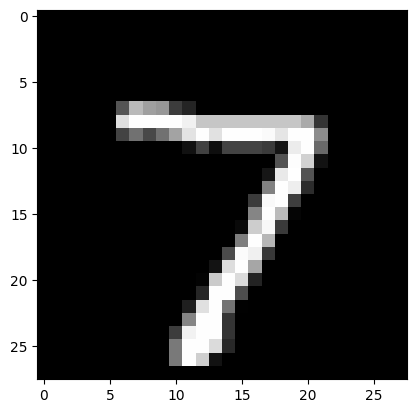

In [70]:
img,label = test_dataset[0]
plt.imshow(img[0],cmap='gray')
print('Shape',img.shape)
print('Label:',label)

Let's define a helper function `predict_image`, which returns the predicted label for a single image tensor.

In [71]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)
    return preds[0].item()

`img.unsqueeze` simply adds another dimension at the begining of the 1x28x28 tensor, making it a 1x1x28x28 tensor, which the model views as a batch containing a single image.

Let's try it out with a few images.

Label: 7 , Predicted: 7


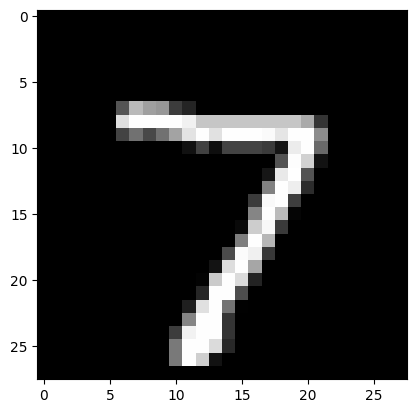

In [72]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 4 , Predicted: 9


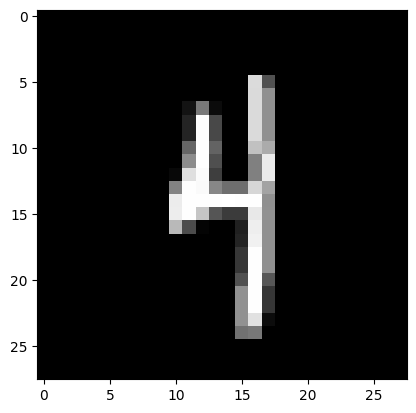

In [73]:
img, label = test_dataset[65]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 2 , Predicted: 8


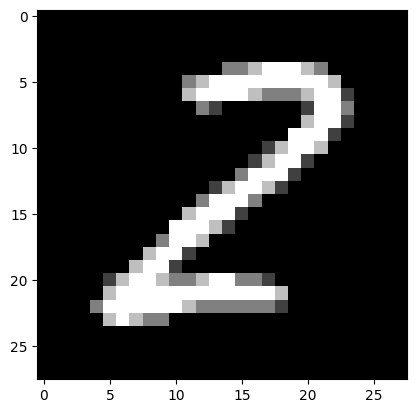

In [74]:
img, label = test_dataset[547]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 5 , Predicted: 5


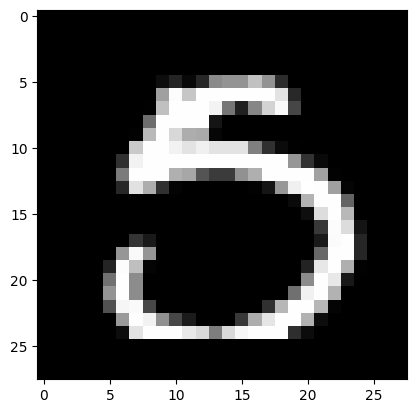

In [75]:
img, label = test_dataset[654]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Identifying where our model performs poorly can help us improve the model, by collecting more training data, increasing/decreasing the complexity of the model, and changing the hypeparameters.

As a final step, let's also look at the overall loss and accuracy of the model on the test set.

In [76]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_loss': 0.5495408773422241, 'val_acc': 0.870410144329071}

We expect this to be similar to the accuracy/loss on the validation set. If not, we might need a better validation set that has similar data and distribution as the test set (which often comes from real world data).

In [80]:
torch.save(model.state_dict(),'mnist-logistic.pth')

The `.state_dict` method returns an `OrderedDict` containing all the weights and bias matrices mapped to the right attributes of the model.

In [81]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0085,  0.0338, -0.0351,  ..., -0.0318,  0.0013, -0.0238],
                      [ 0.0262, -0.0259, -0.0139,  ..., -0.0237, -0.0196,  0.0071],
                      [ 0.0259,  0.0265,  0.0263,  ...,  0.0136, -0.0059, -0.0063],
                      ...,
                      [-0.0336,  0.0215,  0.0141,  ...,  0.0201, -0.0202,  0.0236],
                      [ 0.0041,  0.0129,  0.0347,  ...,  0.0098,  0.0218, -0.0114],
                      [ 0.0250, -0.0106,  0.0081,  ...,  0.0240, -0.0142,  0.0029]])),
             ('linear.bias',
              tensor([-0.0745,  0.1328, -0.0196, -0.0676,  0.0506,  0.0398, -0.0132,  0.0898,
                      -0.1353, -0.0043]))])

To load the model weights, we can instante a new object of the class `MnistModel`, and use the `.load_state_dict` method.

In [82]:
model2 = MnistModel()
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0085,  0.0338, -0.0351,  ..., -0.0318,  0.0013, -0.0238],
                      [ 0.0262, -0.0259, -0.0139,  ..., -0.0237, -0.0196,  0.0071],
                      [ 0.0259,  0.0265,  0.0263,  ...,  0.0136, -0.0059, -0.0063],
                      ...,
                      [-0.0336,  0.0215,  0.0141,  ...,  0.0201, -0.0202,  0.0236],
                      [ 0.0041,  0.0129,  0.0347,  ...,  0.0098,  0.0218, -0.0114],
                      [ 0.0250, -0.0106,  0.0081,  ...,  0.0240, -0.0142,  0.0029]])),
             ('linear.bias',
              tensor([-0.0745,  0.1328, -0.0196, -0.0676,  0.0506,  0.0398, -0.0132,  0.0898,
                      -0.1353, -0.0043]))])